
ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, recall_score

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MIT/ExtraaLearn.csv")

In [ ]:
!jupyternbconvert--tohtml'/content/drive/MyDrive/MIT/assignment2.ipynb'

## Data Overview

- Observations
- Sanity checks

Let's take a first look at the data.

In [ ]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


* The data was read correctly.

In [ ]:
data.shape

(4612, 15)

* There are **4612 rows/observations** and **15 columns/features**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

* There are 4612 non-values for each column. **This means there are no missing values.**
* All data is of the correct type.

Let's check unique values in each column.

In [ ]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

* **The column ID can be dropped** since there are 4612 unique values thus it will not help to analyze the data.
* **All the categorical variables have the correct number of unique values**. For binary variables (yes or no) there are only two. For the rest, there are two or three which was indicated in the problem statement.

In [ ]:
data = data.drop('ID', axis=1)
data.head(2)

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0


Let's check for duplicates.

In [ ]:
print('Number of data duplicated:', data.duplicated().sum())

Number of data duplicated: 14


In [ ]:
data = data.drop_duplicates()

In [ ]:
print('Number of data duplicated:', data.duplicated().sum())
print('Shape of the data frame:', data.shape)

Number of data duplicated: 0
Shape of the data frame: (4598, 14)


The column ID was removed and duplicated data was removed. Therefore, we can start the EDA.

## Exploratory Data Analysis (EDA)

Let's first check the summary statistics for the numerical variables.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4598.0,46.179208,13.160811,18.0,36.00,51.000,57.000,63.000
website_visits,4598.0,3.577642,2.826572,0.0,2.00,3.000,5.000,30.000
time_spent_on_website,4598.0,726.215746,743.884963,0.0,155.25,377.500,1341.750,2537.000
page_views_per_visit,4598.0,3.035339,1.964011,0.0,2.08,2.809,3.759,18.434
status,4598.0,0.299043,0.457889,0.0,0.00,0.000,1.000,1.000


**Observations:**

* **The average age of the leads is around 46 years.** The age range goes from 18 to 63. It is worth noting that underage people are not leads for this company. There is a good age diversity among the leads.
* **Around half of the leads visit the website at least 3 times**, but there are some outliers, with the number of visits being 30.
* **The average time spent on the website is approximately 726 time units.** A maximum time of 2537 was observed, which indicates at least one outlier.
* **At least 50% of the leads do not become paying customers**, which suggests that there is a lot of room for improvement in this area.

Let's check the summary statistics for the categorical variables.

In [ ]:
# Printing the % sub categories of each category
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
for i in cat_cols:
    print(data[i].value_counts(normalize=True)*100)
    print('*'*40)

current_occupation
Professional    56.720313
Unemployed      31.230970
Student         12.048717
Name: proportion, dtype: float64
****************************************
first_interaction
Website       55.154415
Mobile App    44.845585
Name: proportion, dtype: float64
****************************************
profile_completed
High      49.043062
Medium    48.629839
Low        2.327099
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity      49.347542
Phone Activity      26.729013
Website Activity    23.923445
Name: proportion, dtype: float64
****************************************
print_media_type1
No     89.212701
Yes    10.787299
Name: proportion, dtype: float64
****************************************
print_media_type2
No     94.932579
Yes     5.067421
Name: proportion, dtype: float64
****************************************
digital_media
No     88.538495
Yes    11.461505
Name: proportion, dtype: float64
**************************

**Observations:**

* **Most leads, almost 57%, are currently practicing**, indicating that they might want to change jobs or obtain a better one within the same company. Then 31% are unemployed and 12% are students.
* The first interaction is divided almost equally between the website and the mobile app, with **55% of leads interacting with the website and the remaining 45% using the mobile app.**
* **Around 49% of the leads completed most of their profiles**, while approximately 48.5% completed around half of their profiles. Only a small percentage of leads, around 2.3%, completed a small portion of their profiles.
* There is a fair amount of interaction with the leads, with **email being the most frequent method (49.3%)**, followed by phone (26.7%), and lastly, the website (23.9%).
* Most of the leads do not see the ads in any of the different media. Approximately, **89% of leads in every media do not see the ads.**
* **Only a few percentage of leads are refered, that is 2.01%.**

Let's start with the univariate analysis.

First, the function below will help us to plot a histgram and a boxplot in the same figure.

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # X-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

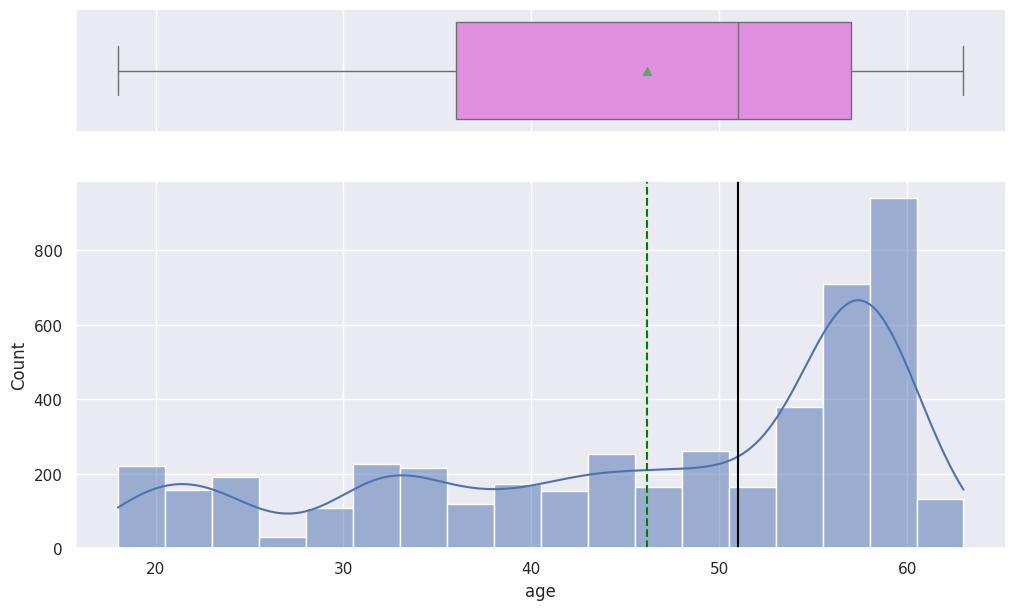

In [ ]:
# Plots for age feature
histogram_boxplot(data, "age", figsize=(12, 7), kde=True, bins=None)

- The distribution is left-skewd.
- Most of the leads are around 50 and 60.
- According to the boxplot, there are no outliers.

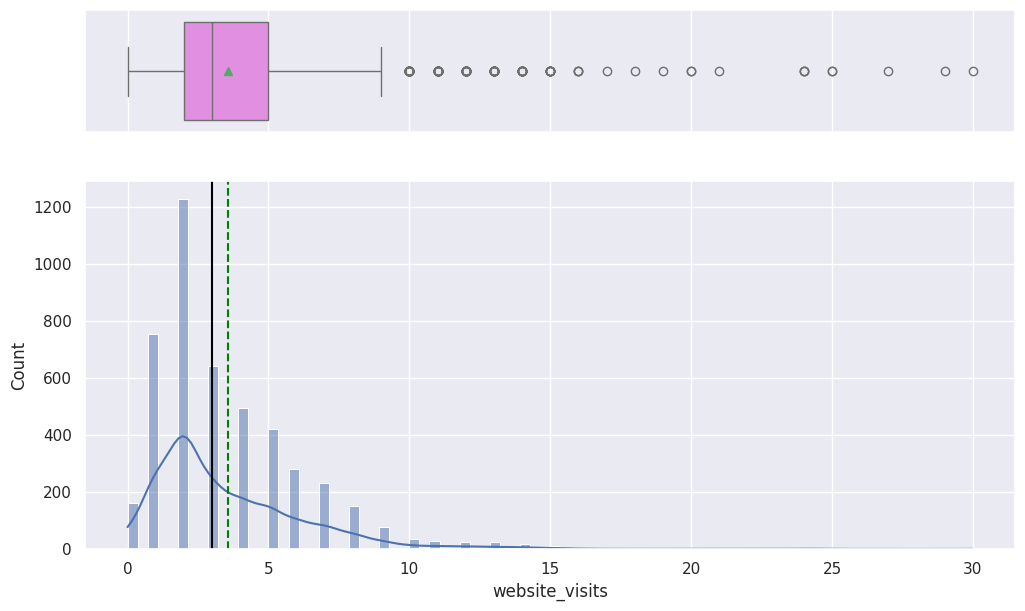

In [ ]:
# Plots for website_visits feature
histogram_boxplot(data, "website_visits", figsize=(12, 7), kde=True, bins=None)

- The distribution for the number of website visits is right-skewed.
- There are several outlieres, these are from people who visits the website 10 times or more.
- Most leads visit the website between 0 and 9 times.

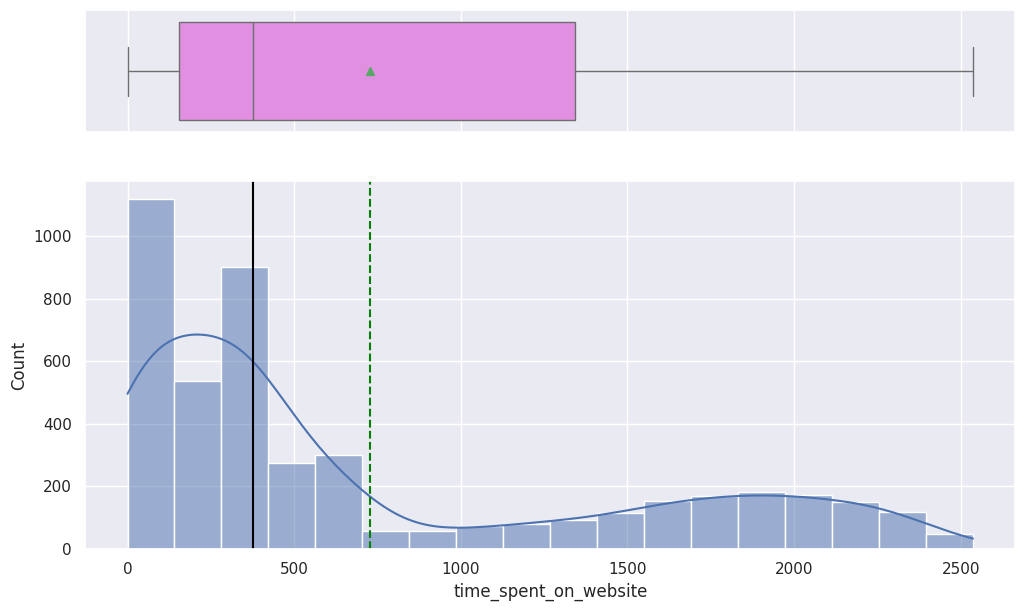

In [ ]:
# Plots for time_spent_on_website feature
histogram_boxplot(data, "time_spent_on_website", figsize=(12, 7), kde=True, bins=None)

- The distribution for the time spent of the website follows a sort of bimodal distrbution.
- There are no ouliers in the data.

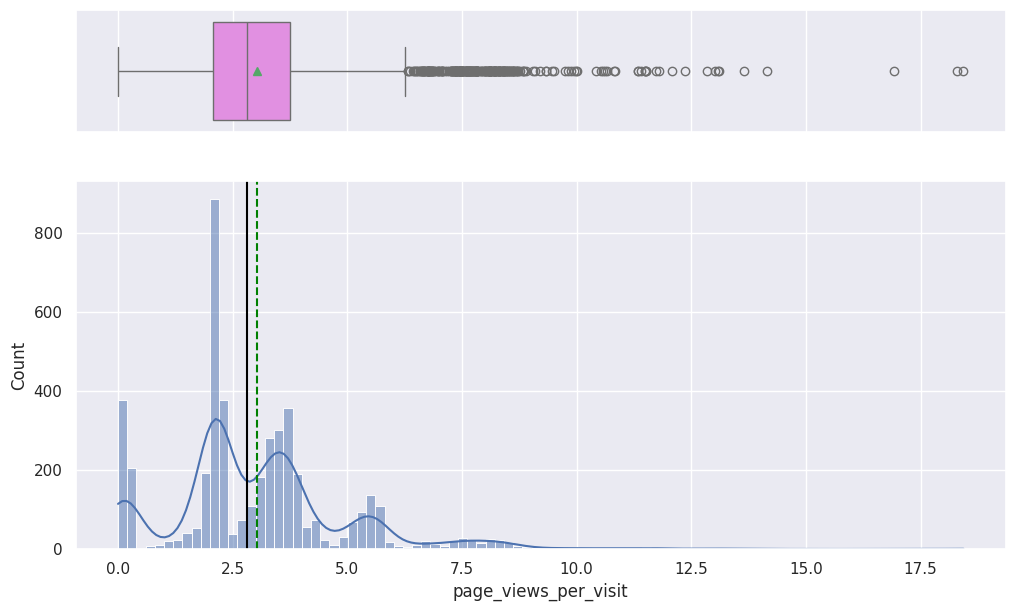

In [ ]:
# Plots for page_views_per_visit feature
histogram_boxplot(data, "page_views_per_visit", figsize=(12, 7), kde=True, bins=None)

- The distributiion for the number of page views per visit follows a bimodal distribution with four peaks.
- There are many outliers on the right-end.
- Most of the data is concentrated between 0 and 6.

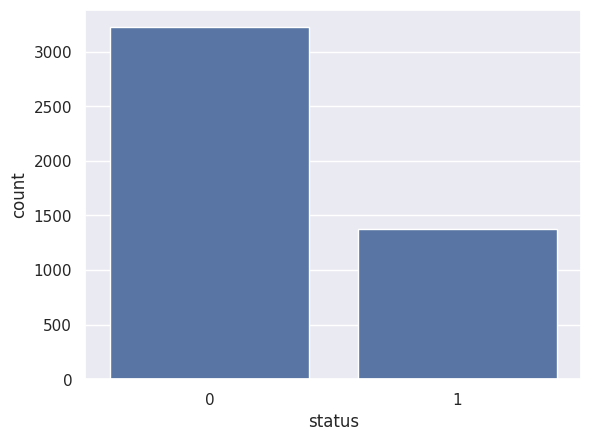

In [ ]:
sns.countplot(x = data['status'])
plt.show()

In [ ]:
data['status'].value_counts(normalize=True)*100

status
0    70.095694
1    29.904306
Name: proportion, dtype: float64

- As mentioned earlier, only 30% of the leads become paying customers.

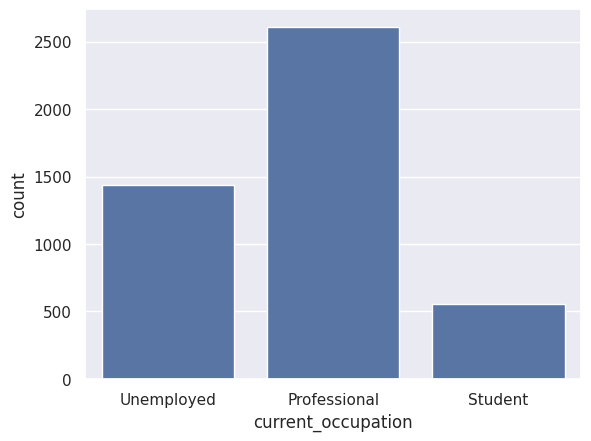

In [ ]:
sns.countplot(x = data['current_occupation'])
plt.show()

In [ ]:
data['current_occupation'].value_counts(normalize=True)*100

current_occupation
Professional    56.720313
Unemployed      31.230970
Student         12.048717
Name: proportion, dtype: float64

- Most leads are professional. This can be because they want to change jobs a get a better position.
- Around 12% of the users are students, and this low number could be due to the fact that some students might not be able to afford a paying subscription.

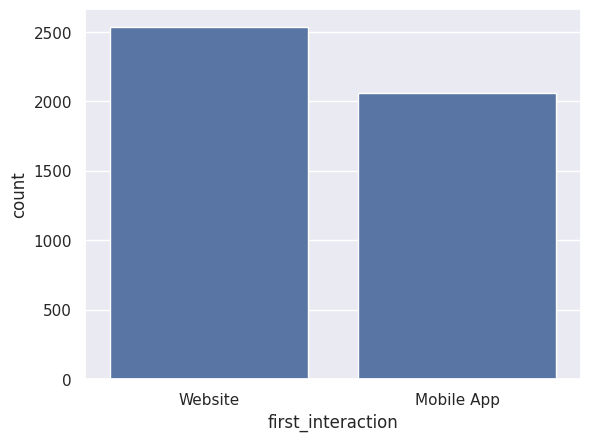

In [ ]:
sns.countplot(x = data['first_interaction'])
plt.show()

In [ ]:
data['first_interaction'].value_counts(normalize=True)*100

first_interaction
Website       55.154415
Mobile App    44.845585
Name: proportion, dtype: float64

- The first interaction is almost equally distributed between the website and the mobile app, with 55.15% for the former and 44.85% for the latter.

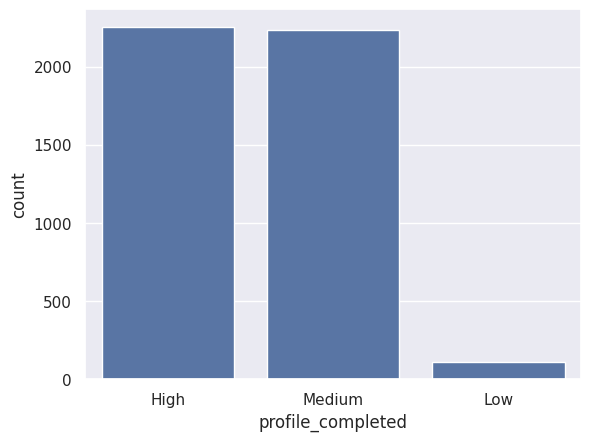

In [ ]:
sns.countplot(x = data['profile_completed'])
plt.show()

In [ ]:
data['profile_completed'].value_counts(normalize=True)*100

profile_completed
High      49.043062
Medium    48.629839
Low        2.327099
Name: proportion, dtype: float64

- Only 2.32% of the leads completed a small portion of their profiles.
- This can be an decisive feature since people who complete most of their profles might end up becoming a paying customer. This will be confirmed in the bivariate analysis.

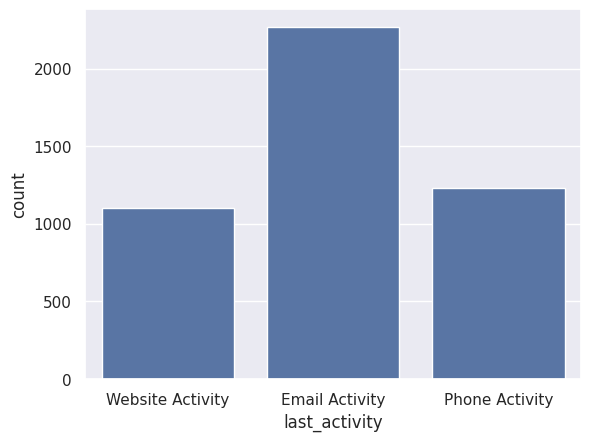

In [ ]:
sns.countplot(x = data['last_activity'])
plt.show()

In [ ]:
data['last_activity'].value_counts(normalize=True)*100

last_activity
Email Activity      49.347542
Phone Activity      26.729013
Website Activity    23.923445
Name: proportion, dtype: float64

- Most leads last interaction is by email, this can be because is easier for people to reply by email than answering a call or going through a website.
- This feature can be also very important since people who actually answer a phone call might be more interested to become a paying customer.

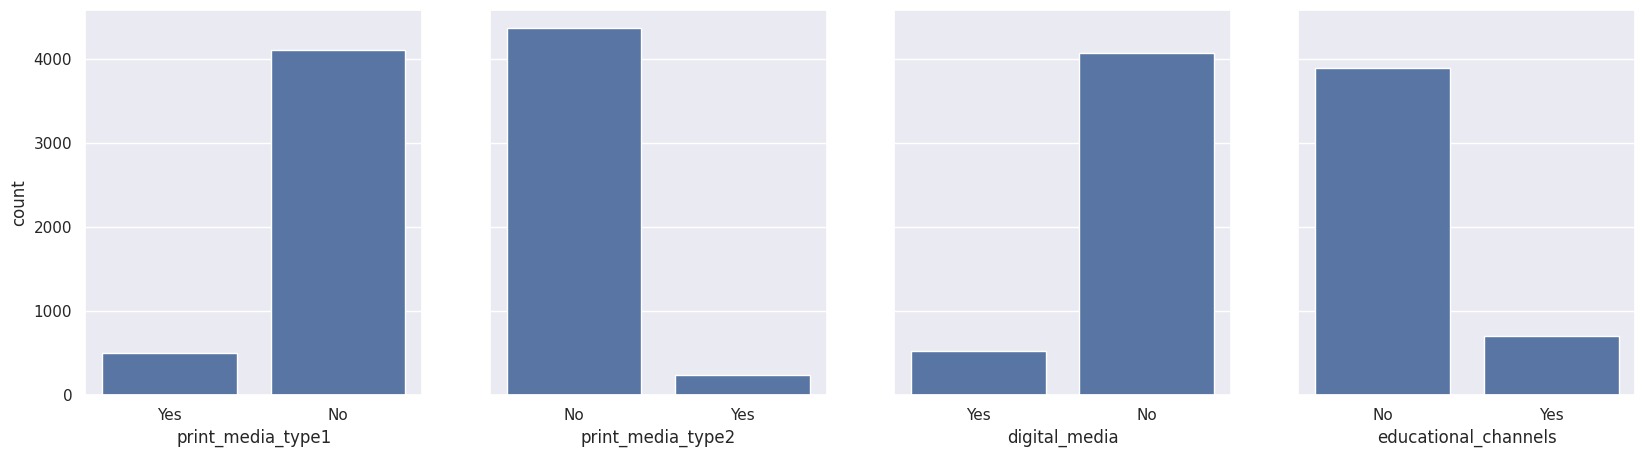

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5),sharey=True)
sns.countplot(x = data['print_media_type1'], ax=axs[0])
sns.countplot(x = data['print_media_type2'], ax=axs[1])
sns.countplot(x = data['digital_media'], ax=axs[2])
sns.countplot(x = data['educational_channels'], ax=axs[3])
plt.show()

In [ ]:
data['print_media_type1'].value_counts(normalize=True)*100

print_media_type1
No     89.212701
Yes    10.787299
Name: proportion, dtype: float64

In [ ]:
data['print_media_type2'].value_counts(normalize=True)*100

print_media_type2
No     94.932579
Yes     5.067421
Name: proportion, dtype: float64

In [ ]:
data['digital_media'].value_counts(normalize=True)*100

digital_media
No     88.538495
Yes    11.461505
Name: proportion, dtype: float64

In [ ]:
data['educational_channels'].value_counts(normalize=True)*100

educational_channels
No     84.688995
Yes    15.311005
Name: proportion, dtype: float64

- As mentioned earlier, most of the leads, in average 89%, did not see the ads in any of the different advertising media. Specially. in magazines.
- The most viewed ad is in educational channels.
- An analysis from the media department needs to be carried out to maybe increase the ads in educational channels and stop those in newspapers and magazines. This needs to be also further investigated in the bivariate analysis.

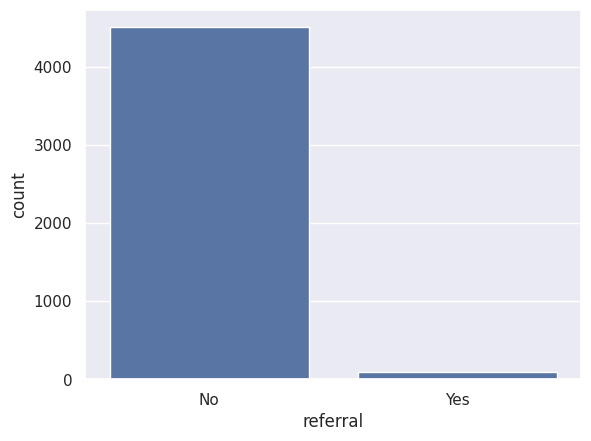

In [ ]:
sns.countplot(x = data['referral'])
plt.show()

In [ ]:
data['referral'].value_counts(normalize=True)*100

referral
No     97.977381
Yes     2.022619
Name: proportion, dtype: float64

- Not many leads are referred, this is only 2% of the observations.
- A discount or some extra benefits can be set in place for the person referring and the referred person to increase this value.

Let's start the bivariate analysis.

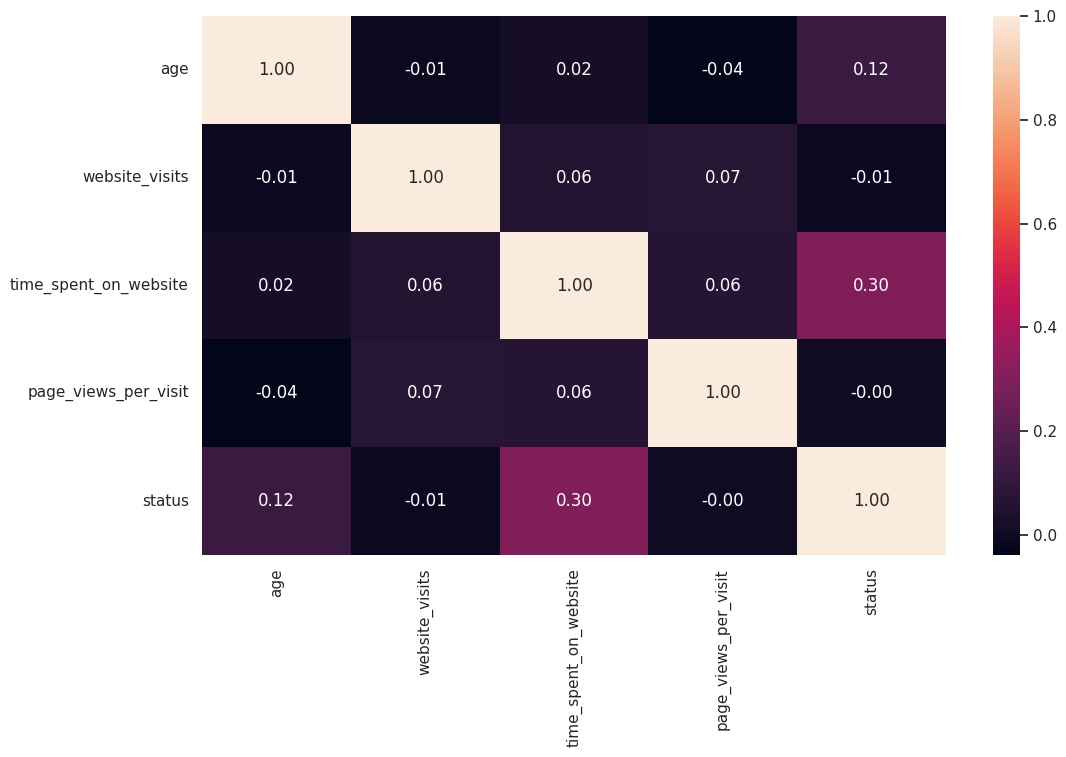

In [ ]:
# Plotting a heatmap to explore the correlation between numerical variables
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status']
plt.figure(figsize=(12, 7))
sns.heatmap(data[num_cols].corr(),annot=True,fmt=".2f")
plt.show()

- The time spent on website and status are positively correlated.
- Age and status have a weak positive correlation.
- No other variables have a significant correlation among them.

In order to explore the relations between the target variable and the categorical variables, we define a function to plot stacked barplots.

In [ ]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(8,4)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel(target)

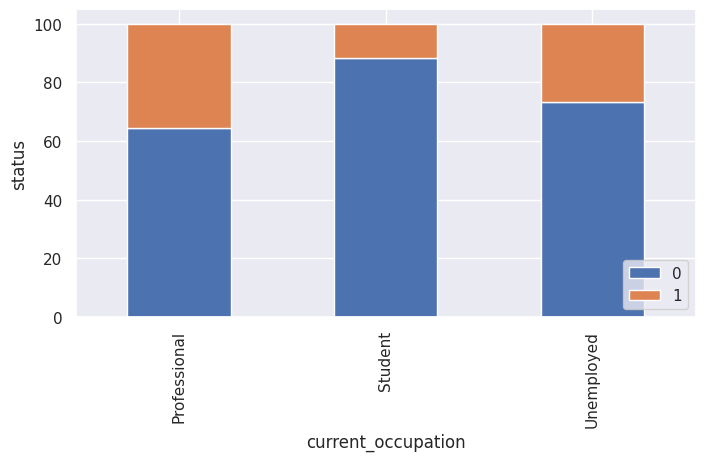

In [ ]:
# Plot current_occupation vs status
stacked_barplot(data, "current_occupation", "status")

- Pressional leads have the highest convertion rate (37%), followed by unemployed people (25%).
- Targeting these two groups may incurr in a better convertion rate.

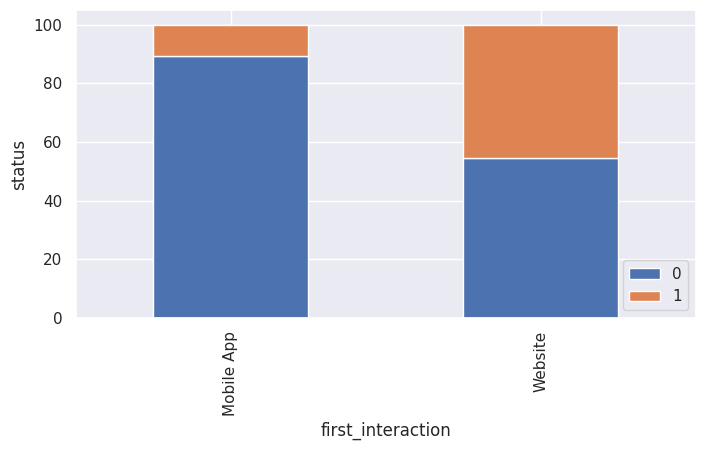

In [ ]:
stacked_barplot(data, "first_interaction", "status")

- Even though the first interaction among the leads was almost equally distribuited, we observe a much higher convertion rate for leads whose first interaction is through the website.
- ExtraaLearn can invest in a much better experience for the mobile app to improve the convertion rate.

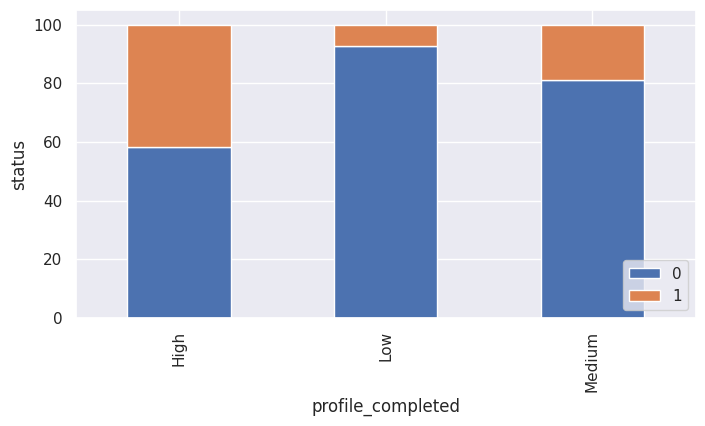

In [ ]:
stacked_barplot(data, "profile_completed", "status")

- Leads who complete all or most of their profile are more likely to become paying customers as we can observe from the barplot.
- Reviewing how the website or mobile app present the informtion without asking a lot of presonal information can increase the convertion rate.

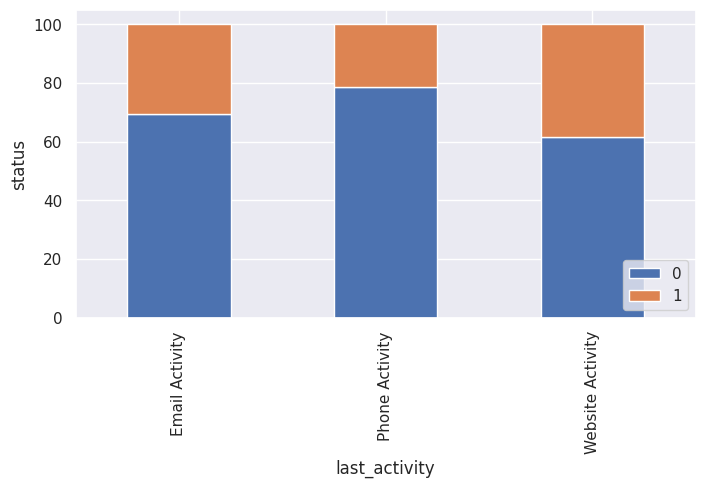

In [ ]:
stacked_barplot(data, "last_activity", "status")

- The interaction activity with the highest convertion rate iss throught the website. This can be because using an offical channel can increase the confidence of the service provider.

- Email activity is in second place followed by phone activity. These two have a decent convertion rate.


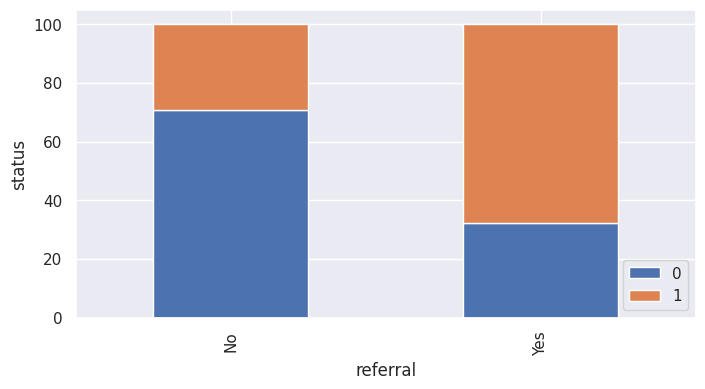

In [ ]:
stacked_barplot(data, "referral", "status")

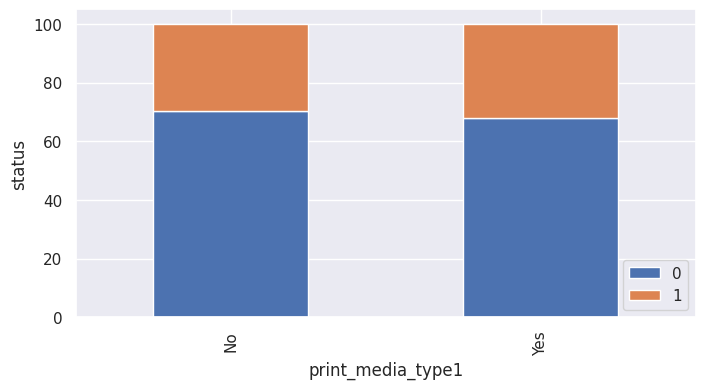

In [ ]:
stacked_barplot(data, "print_media_type1", "status")

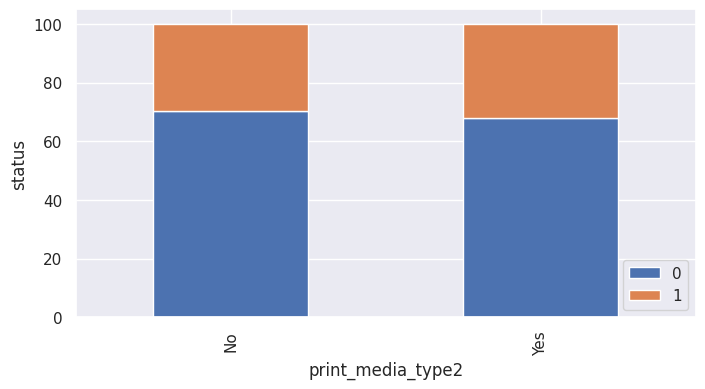

In [ ]:
stacked_barplot(data, "print_media_type2", "status")

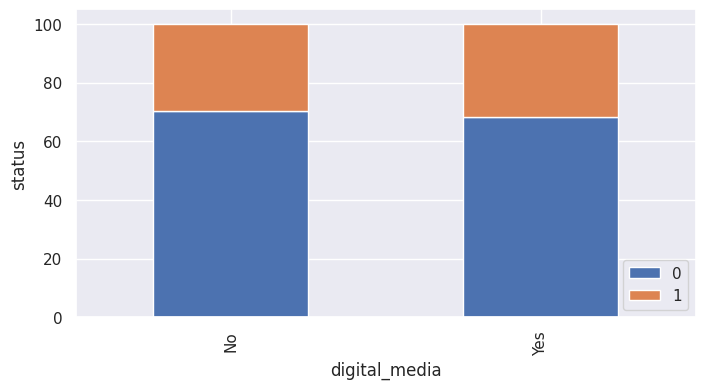

In [ ]:
stacked_barplot(data, "digital_media", "status")

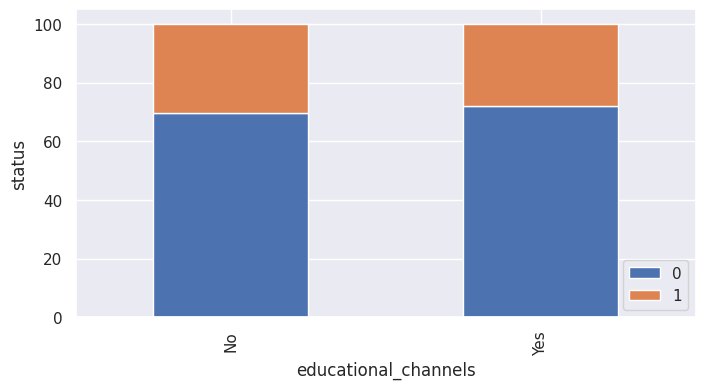

In [ ]:
stacked_barplot(data, "educational_channels", "status")

- All the advertising channels, except referral, have around the same converstion rate wether they saw the ads or not.
-  Referral have a high converstion rate. However, we saw from the univariate analysis that only 2% of the leads were referred. This can be a deceiving data. Further analysis needs to be done in the ML model.

## Data Preprocessing

We observed before that there are no missing values therefore no data imputation is necessary. First, we encode the categorical variables using dummy variables.

In [ ]:
# Encoding categorical variables in a new data frame df
df=pd.get_dummies(data, columns=cat_cols, drop_first=True)
df.head(2)

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,1,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.320,0,False,False,False,False,True,False,True,False,False,False,True,False


We detect some outliers in features page_views_pervisit and website_visits. Let's see how many there in order to decide if remove them or not.

In [ ]:
df.website_visits.value_counts(normalize=True)

website_visits
2     0.267290
1     0.164202
3     0.139408
4     0.107438
5     0.091779
6     0.061331
7     0.050457
0     0.034798
8     0.032840
9     0.016964
10    0.007395
11    0.006307
12    0.005437
13    0.005002
14    0.003697
15    0.001957
24    0.000652
16    0.000652
25    0.000435
20    0.000435
30    0.000217
18    0.000217
27    0.000217
21    0.000217
17    0.000217
19    0.000217
29    0.000217
Name: proportion, dtype: float64

- The percentage of website visits 16 or above is very less. We can consider these values as outliers.

From the histogram of page_views_pervisit, there are three outliers above 15. We can consider those as outliers.

In [ ]:
df[df.page_views_per_visit>15]

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
4,23,4,600,16.914,0,True,False,True,False,False,False,False,False,False,False,False,False
32,58,12,1151,18.434,0,False,False,False,False,False,True,False,False,False,False,True,False
268,57,3,1009,18.302,0,False,False,False,False,True,True,False,False,False,False,False,False


**Removing outliers**

In [ ]:
# Dropping observaions with website visits greater than 15.
df.drop(index=df[df.website_visits>=16].index,inplace=True)

# Dropping observations with page views pero visit greater than 15.
df.drop(index=df[df.page_views_per_visit>15].index,inplace=True)

**Data preparation for modeling**

Let's start by splitting the target variable and the independent variables.

In [ ]:
# Separating target variable and other variables
X=df.drop(columns='status')
Y=df['status']

We split the data into a  70% train set and 30% test set

In [ ]:
# Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

## EDA

We check the new distribution of the manipulated variables.

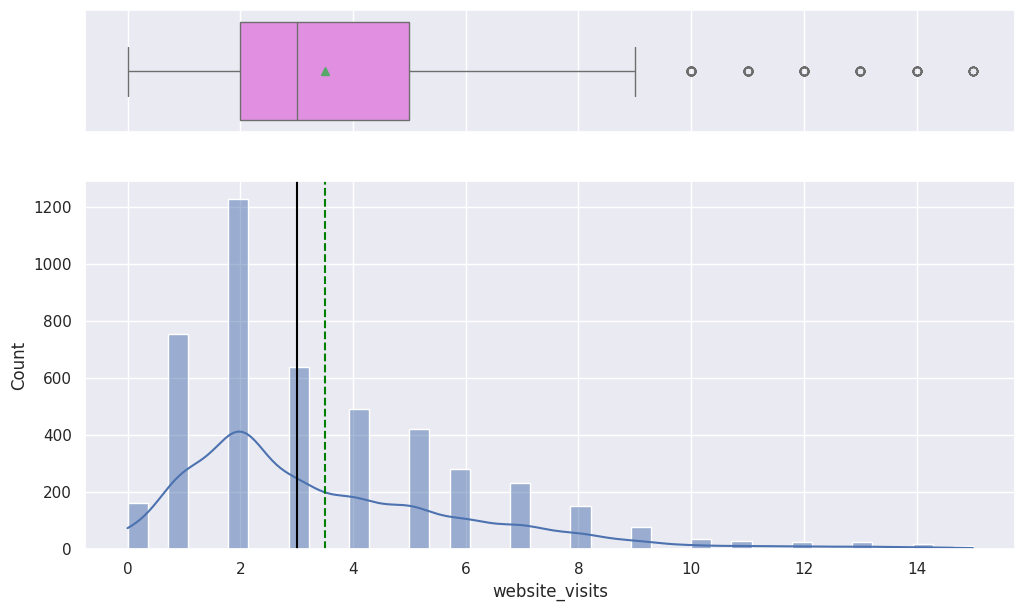

In [ ]:
# Plots for website_visits feature
histogram_boxplot(df, "website_visits", figsize=(12, 7), kde=True, bins=None)

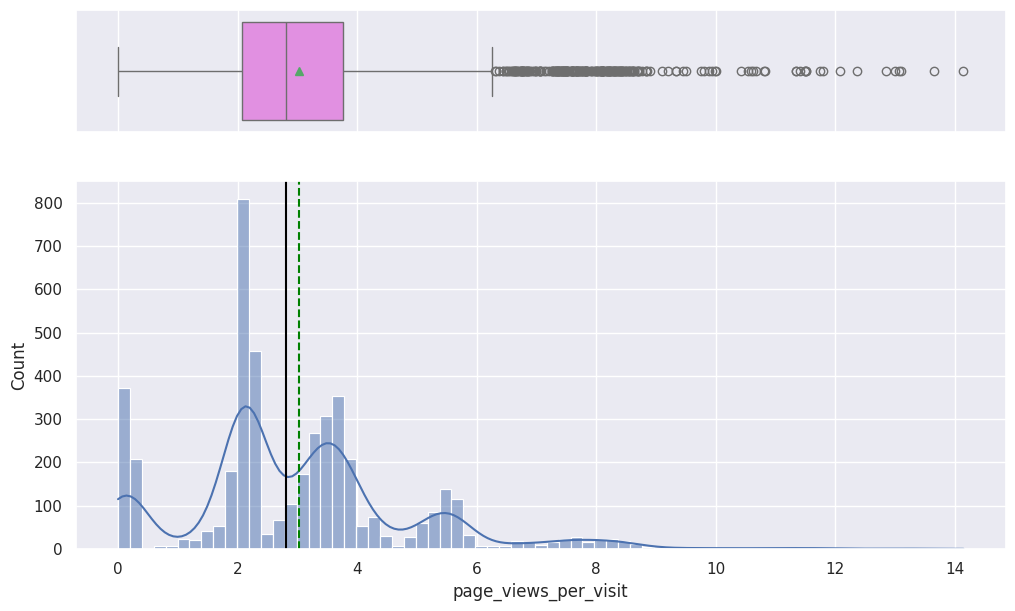

In [ ]:
# Plots for page_views_per_visit feature
histogram_boxplot(df, "page_views_per_visit", figsize=(12, 7), kde=True, bins=None)

The data looks correct. We proceed to build the ML model.

## Building a Decision Tree model

Let's first create a function that prints some metrics and the confusion matrix.

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

- The status equal to 0 is the dominant class. Therefore to avoid bias, we use the class_weight hypermarameter to avoid this.

In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

In [ ]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2244
           1       1.00      1.00      1.00       960

    accuracy                           1.00      3204
   macro avg       1.00      1.00      1.00      3204
weighted avg       1.00      1.00      1.00      3204



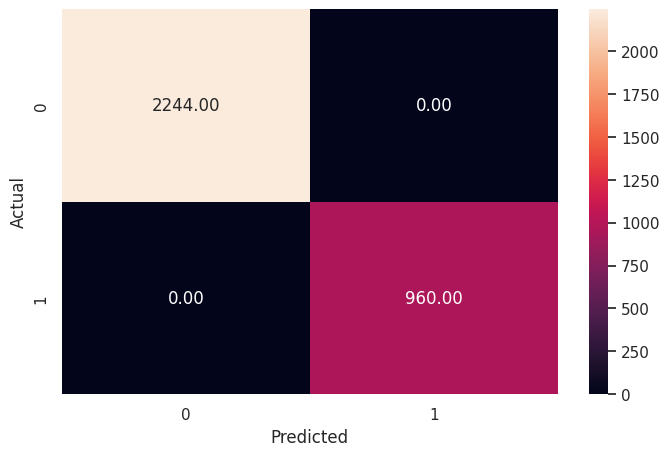

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       963
           1       0.66      0.65      0.66       411

    accuracy                           0.80      1374
   macro avg       0.76      0.75      0.76      1374
weighted avg       0.80      0.80      0.80      1374



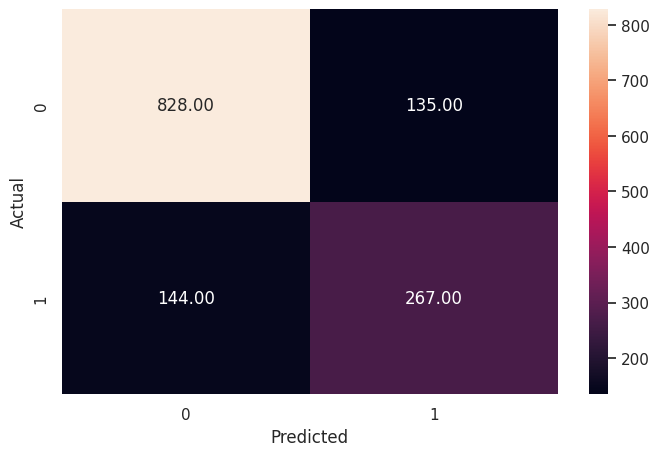

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations**
- The model is clearly overfitting on the train set since the recall is 1 on the train set and 0.65 in the test set.
- Furthermore, the model suggests that there's a 34% chance that a person who will become a paying customer is not detected as such. Therefore, if ExtraaLearn does not approach this person, they might lose a client.

Let's check the most important features.

<Axes: xlabel='Importance', ylabel='None'>

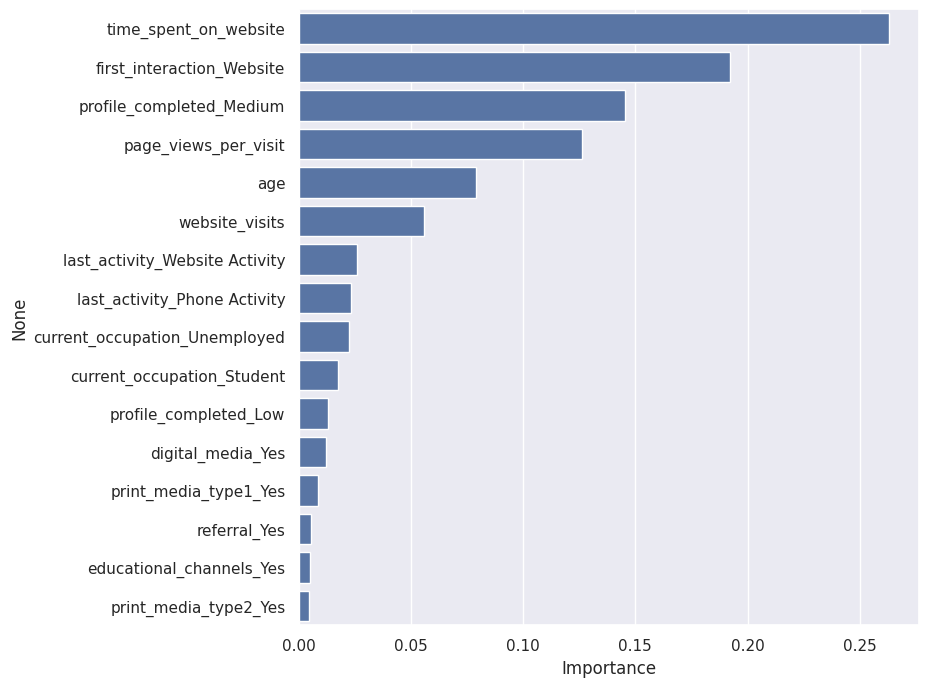

In [ ]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))

sns.barplot(x=importance_df.Importance,y=importance_df.index, orient='h')

- The Decision Tree identifies the time spent on the website, the first interaction being the website and profile completion as medium as the most important features.
- This makes sense that people that are very interested go through all the available content in the website before deciding to spend money or not.

### Decision Tree tuning

This model nees to be tuned since the model is overfitting the data on the training set and giving poor results on the test set.

The tuning of the parameters **criterion**, **max_depth**, **min_samples_leaf** is carried out.

In [ ]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 5)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=11,
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2244
           1       0.73      0.91      0.81       960

    accuracy                           0.87      3204
   macro avg       0.84      0.88      0.86      3204
weighted avg       0.89      0.87      0.88      3204



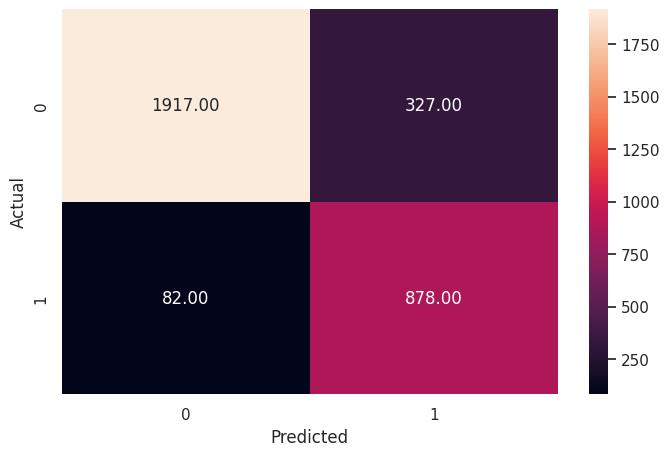

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       963
           1       0.66      0.82      0.74       411

    accuracy                           0.82      1374
   macro avg       0.79      0.82      0.80      1374
weighted avg       0.84      0.82      0.83      1374



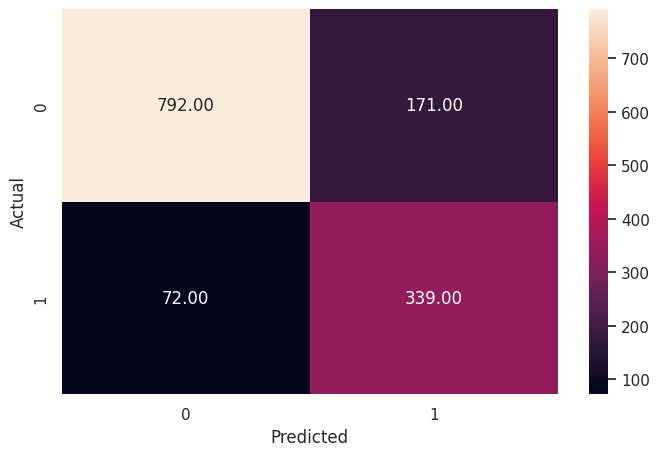

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**
- The tuned model presents worst metrics than the model with default parameters. The latter is normal since we reduced overfitting by tuning the model.
- The recall is of 0.91 and 0.82 for the train set and test set, respectively. This is an imporvement in comparison with the model with default parameters.
- The precision is apporximately the same in both train and test set. However, there is no significant imporvement between the tuned model and that with default parameters since both give 0.66 of precision on the test set.

Let's check the most important features.

<Axes: xlabel='Importance', ylabel='None'>

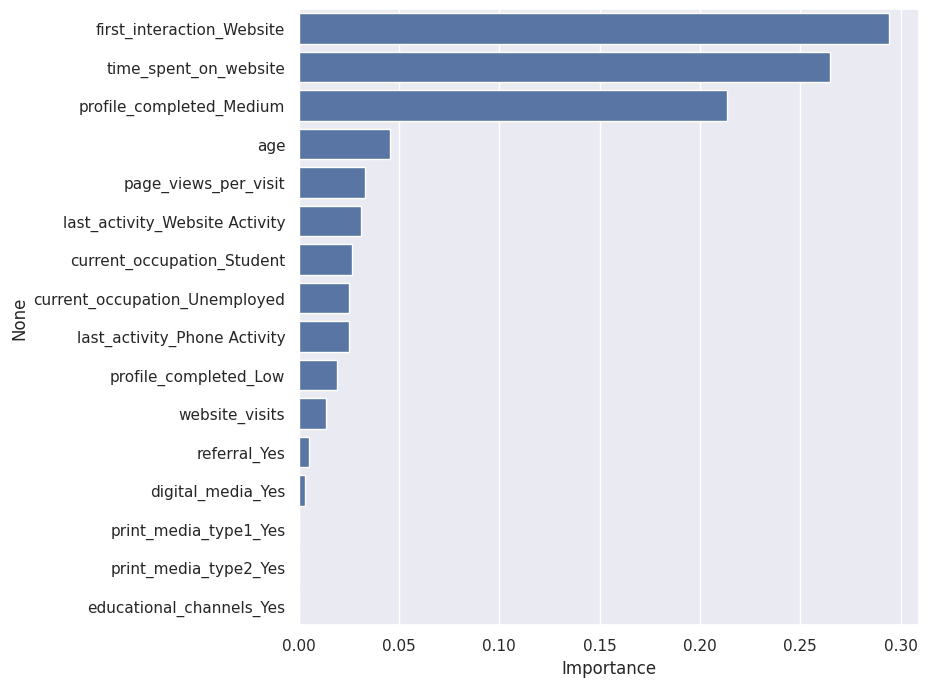

In [ ]:
# Plot the feature importance

importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))

sns.barplot(x=importance_df.Importance,y=importance_df.index, orient='h')

**Observations:**
- The tuned model considers as the most important features the `first_interaction_website`, `time_spent_on_website` and `profile_completed_medium`.
- The model with default parameters considers the same features as the most important but the tuned model has in first place `first_interaction_website`.
- In addition, the tuned model removes/reduces importance of the ads channels.
- We proceed to model a random forest to see if the results can be improved.

## Building a Random Forest model

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2244
           1       1.00      1.00      1.00       960

    accuracy                           1.00      3204
   macro avg       1.00      1.00      1.00      3204
weighted avg       1.00      1.00      1.00      3204



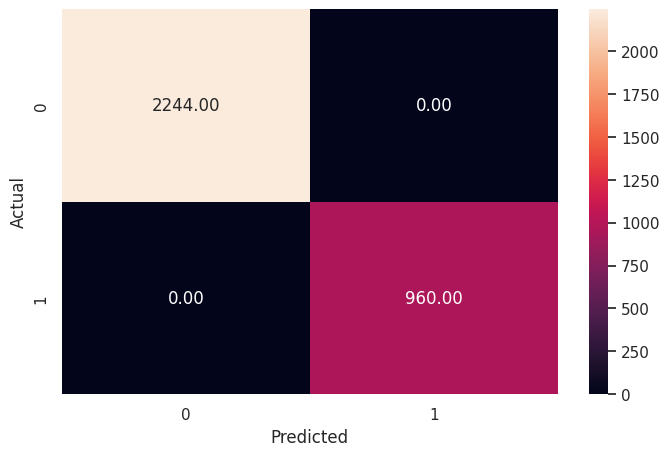

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       963
           1       0.79      0.68      0.73       411

    accuracy                           0.85      1374
   macro avg       0.83      0.80      0.81      1374
weighted avg       0.85      0.85      0.85      1374



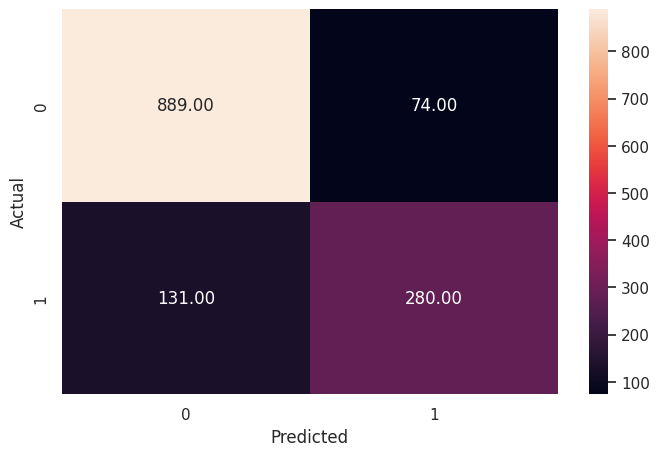

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**
- The random forest model is overfitting. All scores on the train set are equl to 1.
- The scores on the test set are decent having a precision of 0.79 and recall of 0.68. This model gives slightly better results than the decision tree with default parameters.
- The f1-score of the tuned Decision Tree model and the random forest model are practically the same, 0.74 for the former and 0.73 for the latter. However, so far we consider the tuned decision tree as the best model since it has a higher recall. A higher recall means that leads that are liklely to become paying customers are detected.

Let's check the most important features.

<Axes: xlabel='Importance', ylabel='None'>

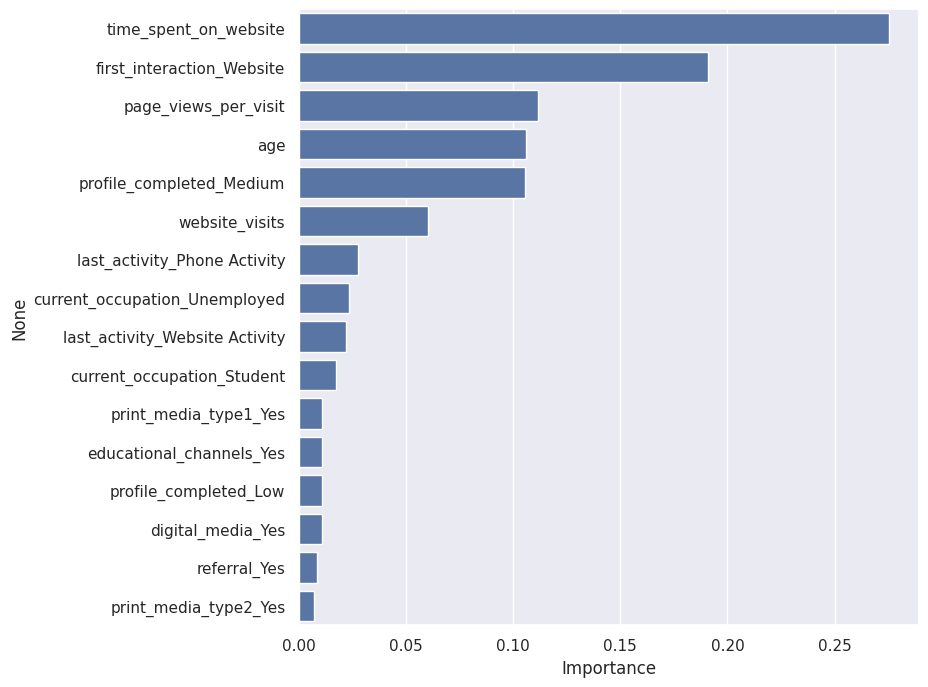

In [ ]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))

sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Observations:**
- We observe similar feature importances to those of the decision tree models.
- This time, the random forest model considers `page_views_per_visit` as the third most important feature followed by `age` by not a great difference.
- A pattern where variables related to the website are the most important.

## Random Forest tuning

The random forest model is tuned in order to find better parameters to improve the result of the model with default parameters.

The parameters to be tuned are **n_estimators**, **min_samples_leaf** and **max_features**.

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_split": [10, 30, 50, 70],
        "max_leaf_nodes": [50, 75, 150, 250],
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features='auto',
                       max_leaf_nodes=50, min_samples_split=70, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      2244
           1       0.72      0.86      0.78       960

    accuracy                           0.86      3204
   macro avg       0.83      0.86      0.84      3204
weighted avg       0.87      0.86      0.86      3204



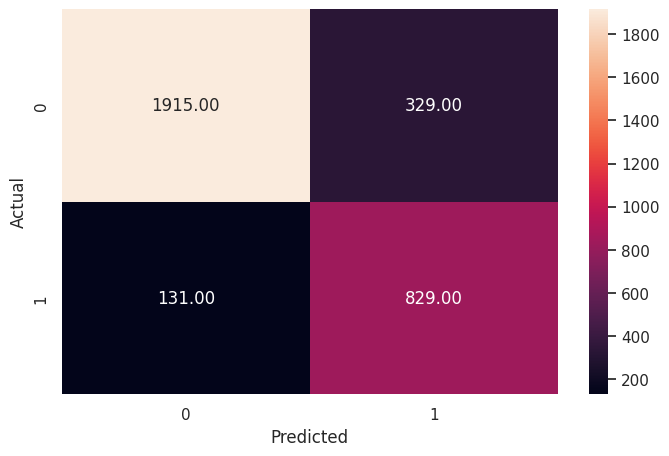

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.93      0.85      0.88       963
           1       0.70      0.84      0.76       411

    accuracy                           0.84      1374
   macro avg       0.81      0.84      0.82      1374
weighted avg       0.86      0.84      0.85      1374



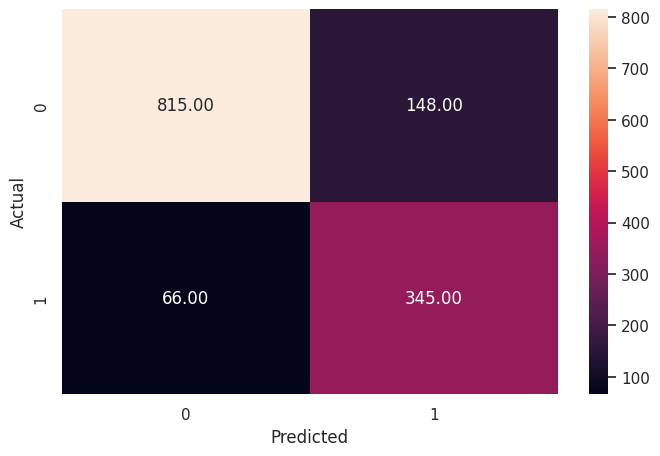

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Observations:**
- The tuned model gives better results than the model with default parameters since we reduced overfitting.
- The tuned model performs well on both train and test set, thus obtaining a generalised results.

Let's check the feature importance.

<Axes: xlabel='Importance'>

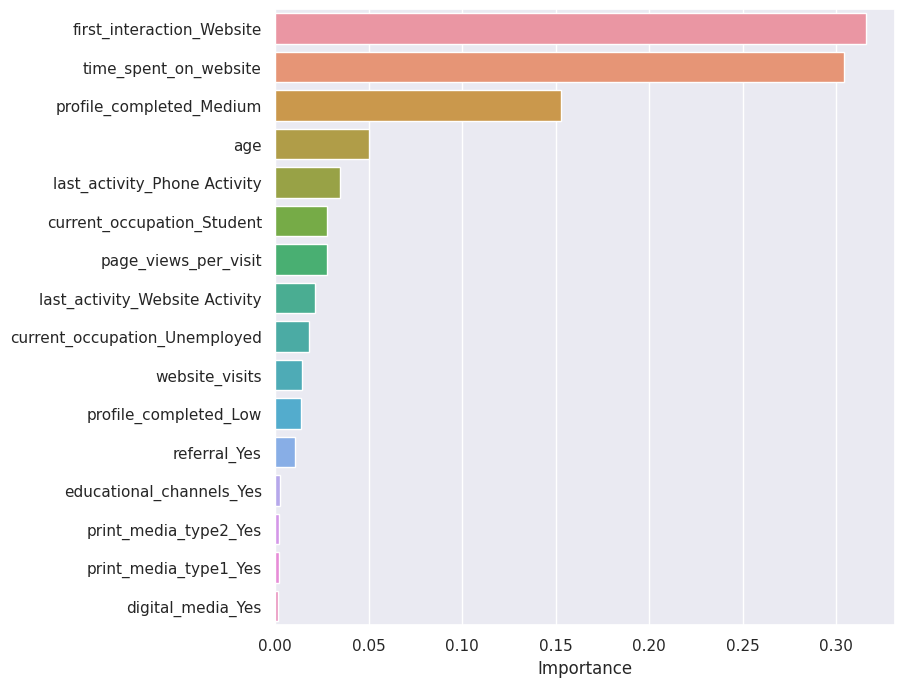

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))

sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Observations:**

- Once again the most important features are: `first_interaction_website`, `time_spent_on_website` and `profile_completed_medium`.
- This confirms that the key features are related to the website.
- The best model is the tuned random forest model since it has balanced scores on both the train and test data sets.
- It can ba arguable that the tuned decision model is also a very good option because the recall score on the train set is 0.93 and on the test set is 0.82. However, the differnce between once set and the other is singificatly big compared to the tuned random forest.

## **Conclusions:**

- A thourough anlysis on a data set provded by ExtraaLearn was carried out to identify the leads that might become paying costumers.
- The EDA shows that 30% of the leads became paying customers. Also that most of the media channles do not have an impact on the conversion rate.
- Two modeling techniques are used: Decision Tree and Random Forest. In addition, models with default parameters and tuned models are considered.
- The best model is the Tuned Random Forest with generalised balanced results on both recall and precision.
- The analysis pointed out that the most importatn features are those related to the website such as the first interaction, the time spent of the website, profile completion and number of page views per visit.
- Furthermore, the media channels do not impact the decision of a lead to become a paying customer.

## **Recommendations:**
- The analysis shows that website realted variables are of great importance. ExtraaLearn should invest its resources on improving the user experience of the website.
- The first interaction with the website is the most decisive feature that will make a lead to become a paying customer. Research on making a lead that interacts first with the mobile app to visit the website as well might improve the conversion rate.
- The time spent onn the webiste indicates the interest of the lead to buy the suscription by exploring the content and resources ExtraaLearn provides. Designing the website in such a way that these are easy to find and entertaining will increase the convertion rate.
- Finally, the profile completion also plays a role on lead conversion rate. ExtraaLearn should research on how to make the lead to complete their profiles wihtout blocking to much of the content on the website.
- The ads channels have a very low impact on the conversion rate. Two options arise: stop investing on ads on magazines or newspaper or give some special discount if the lead provide some code or somithing or the sort that are only available in these ads channels.